## Deep Transfer Learning with CNN on DNA Sequence Dataset

By: Sk. Tanzir Mehedi

Importing libraries

In [ ]:
import time
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import TensorBoard
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Importing the Dataset

In [ ]:
dataset=pd.read_csv('preprocessedDNASequenceDatase.csv')

Exploratory Data Analysis

In [ ]:
dataset.head()

,page_like,page_followers,page_category,familiar,symbol,age,sex,post_category,post_views,post_share,post_comments,post_comment_type,post_like,post_love,post_smile,post_care,post_wow,post_angry,post_sad,label
0,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.004926,0.000009,4.900000e-07,0.000008,0.333333,0.000025,6.120000e-07,0.000082,0.000013,0.000034,0.000197,0.000050,1
1,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,5.310000e-06,0.000027,0.333333,0.000037,4.080000e-07,0.000072,0.000025,0.000024,0.000705,0.000100,1
2,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,7.780000e-06,0.000077,0.333333,0.000041,8.160000e-07,0.000002,0.000132,0.000136,0.000082,0.000064,1
3,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,3.960000e-06,0.000043,0.333333,0.000040,2.650000e-06,0.000003,0.000025,0.000034,0.000918,0.000241,1
4,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,1.820000e-06,0.000043,0.333333,0.000022,1.220000e-06,0.000005,0.000069,0.000034,0.001098,0.000018,1


In [ ]:
properties = list(dataset.columns.values)
properties.remove('label')
X = dataset[properties]
y = dataset['label']

Split Dataset into Training Set and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Check the nb classes

In [ ]:
nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
nb_classes

2

Transform the labels from integers to one hot vectors

In [ ]:
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))

y_train = enc.transform(y_train.values.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.values.reshape(-1, 1)).toarray()

Save orignal y because later we will use binary

In [ ]:
y_true = np.argmax(y_test, axis=1)

If univariate then add a dimension to make it multivariate with one dimension

In [ ]:
 if len(X_train.shape) == 2: 
        X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
        input_shape = X_train.shape[1:]

Making the Model

In [ ]:
input_layer = keras.layers.Input(input_shape)

conv1 = keras.layers.Conv1D(filters=6, kernel_size=7, padding='same', activation='relu')(input_layer)
conv1 = keras.layers.AveragePooling1D(pool_size=3)(conv1)

conv2 = keras.layers.Conv1D(filters=12, kernel_size=7, padding='same',activation='relu')(conv1)
conv2 = keras.layers.AveragePooling1D(pool_size=1)(conv2)

flatten_layer = keras.layers.Flatten()(conv2)

output_layer = keras.layers.Dense(units=nb_classes, activation='sigmoid')(flatten_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)

Compile the Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 19, 6)             48        
_________________________________________________________________
average_pooling1d (AveragePo (None, 6, 6)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 12)             516       
_________________________________________________________________
average_pooling1d_1 (Average (None, 6, 12)             0         
_________________________________________________________________
flatten (Flatten)            (None, 72)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                

Result View with TensorBoard

In [ ]:
NAME = "CNN on DNA Seeuence Dataset"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME), histogram_freq = 1, profile_batch = '500,520')

Fitting the model

In [ ]:
# X_test and y_test are only used to monitor the test loss and NOT for training

mini_batch_size = 64
nb_epochs = 1000

start_time = time.time()
history=model.fit(X_train, y_train, batch_size=mini_batch_size, epochs=nb_epochs, validation_data=(X_test, y_test), callbacks=[tensorboard])
duration = time.time() - start_time

Epoch 1/1000
55/55 [==============================] - 3s 51ms/step - loss: 0.4950 - accuracy: 0.9637 - val_loss: 0.2508 - val_accuracy: 0.9714
Epoch 2/1000
55/55 [==============================] - 1s 13ms/step - loss: 0.1677 - accuracy: 0.9637 - val_loss: 0.1167 - val_accuracy: 0.9714
Epoch 3/1000
55/55 [==============================] - 1s 16ms/step - loss: 0.1397 - accuracy: 0.9637 - val_loss: 0.1147 - val_accuracy: 0.9714
Epoch 4/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.1382 - accuracy: 0.9637 - val_loss: 0.1133 - val_accuracy: 0.9714
Epoch 5/1000
55/55 [==============================] - 1s 13ms/step - loss: 0.1361 - accuracy: 0.9637 - val_loss: 0.1119 - val_accuracy: 0.9714
Epoch 6/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.1335 - accuracy: 0.9637 - val_loss: 0.1083 - val_accuracy: 0.9714
Epoch 7/1000
55/55 [==============================] - 1s 12ms/step - loss: 0.1300 - accuracy: 0.9637 - val_loss: 0.1054 - val_accuracy: 0.9714

Epoch 112/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0517 - accuracy: 0.9849 - val_loss: 0.0444 - val_accuracy: 0.9907
Epoch 113/1000
55/55 [==============================] - 1s 12ms/step - loss: 0.0526 - accuracy: 0.9849 - val_loss: 0.0439 - val_accuracy: 0.9887
Epoch 114/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0518 - accuracy: 0.9860 - val_loss: 0.0460 - val_accuracy: 0.9873
Epoch 115/1000
55/55 [==============================] - 1s 12ms/step - loss: 0.0525 - accuracy: 0.9854 - val_loss: 0.0439 - val_accuracy: 0.9887
Epoch 116/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0521 - accuracy: 0.9849 - val_loss: 0.0440 - val_accuracy: 0.9887
Epoch 117/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0513 - accuracy: 0.9849 - val_loss: 0.0437 - val_accuracy: 0.9887
Epoch 118/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.0516 - accuracy: 0.9851 - val_loss: 0.0435 - val_accur

Epoch 225/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0452 - accuracy: 0.9871 - val_loss: 0.0387 - val_accuracy: 0.9913
Epoch 226/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0447 - accuracy: 0.9874 - val_loss: 0.0458 - val_accuracy: 0.9860
Epoch 227/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 0.0383 - val_accuracy: 0.9913
Epoch 228/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0448 - accuracy: 0.9877 - val_loss: 0.0382 - val_accuracy: 0.9913
Epoch 229/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0457 - accuracy: 0.9866 - val_loss: 0.0384 - val_accuracy: 0.9913
Epoch 230/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0443 - accuracy: 0.9880 - val_loss: 0.0389 - val_accuracy: 0.9913
Epoch 231/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0447 - accuracy: 0.9877 - val_loss: 0.0385 - val_accuracy:

Epoch 282/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0428 - accuracy: 0.9877 - val_loss: 0.0368 - val_accuracy: 0.9913
Epoch 283/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0418 - accuracy: 0.9880 - val_loss: 0.0385 - val_accuracy: 0.9913
Epoch 284/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0418 - accuracy: 0.9880 - val_loss: 0.0379 - val_accuracy: 0.9913
Epoch 285/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0416 - accuracy: 0.9886 - val_loss: 0.0376 - val_accuracy: 0.9913
Epoch 286/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0427 - accuracy: 0.9857 - val_loss: 0.0372 - val_accuracy: 0.9913
Epoch 287/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0417 - accuracy: 0.9877 - val_loss: 0.0410 - val_accuracy: 0.9900
Epoch 288/1000
55/55 [==============================] - 1s 18ms/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.0375 - val_accuracy

Epoch 339/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0374 - val_accuracy: 0.9913
Epoch 340/1000
55/55 [==============================] - 1s 16ms/step - loss: 0.0395 - accuracy: 0.9889 - val_loss: 0.0360 - val_accuracy: 0.9913
Epoch 341/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0362 - val_accuracy: 0.9913
Epoch 342/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0359 - val_accuracy: 0.9913
Epoch 343/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0368 - val_accuracy: 0.9913
Epoch 344/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0402 - accuracy: 0.9883 - val_loss: 0.0359 - val_accuracy: 0.9913
Epoch 345/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0388 - accuracy: 0.9891 - val_loss: 0.0362 - val_accurac

Epoch 396/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0376 - accuracy: 0.9891 - val_loss: 0.0355 - val_accuracy: 0.9907
Epoch 397/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0377 - accuracy: 0.9874 - val_loss: 0.0355 - val_accuracy: 0.9913
Epoch 398/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0351 - val_accuracy: 0.9913
Epoch 399/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0381 - accuracy: 0.9886 - val_loss: 0.0352 - val_accuracy: 0.9913
Epoch 400/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0368 - val_accuracy: 0.9913
Epoch 401/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0376 - accuracy: 0.9889 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 402/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0385 - accuracy: 0.9894 - val_loss: 0.0354 - val_accuracy

Epoch 453/1000
55/55 [==============================] - 1s 14ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0354 - val_accuracy: 0.9913
Epoch 454/1000
55/55 [==============================] - 1s 12ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0352 - val_accuracy: 0.9913
Epoch 455/1000
55/55 [==============================] - 1s 14ms/step - loss: 0.0364 - accuracy: 0.9897 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 456/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0357 - val_accuracy: 0.9907
Epoch 457/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 458/1000
55/55 [==============================] - 1s 12ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0352 - val_accuracy: 0.9907
Epoch 459/1000
55/55 [==============================] - 1s 14ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0357 - val_acc

Epoch 510/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0351 - val_accuracy: 0.9913
Epoch 511/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0350 - val_accuracy: 0.9920
Epoch 512/1000
55/55 [==============================] - 1s 13ms/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.0349 - val_accuracy: 0.9913
Epoch 513/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0358 - accuracy: 0.9880 - val_loss: 0.0349 - val_accuracy: 0.9913
Epoch 514/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0363 - accuracy: 0.9897 - val_loss: 0.0352 - val_accuracy: 0.9907
Epoch 515/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0361 - accuracy: 0.9880 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 516/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.0349 - val_accuracy

Epoch 567/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0347 - val_accuracy: 0.9907
Epoch 568/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0346 - val_accuracy: 0.9913
Epoch 569/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0358 - val_accuracy: 0.9913
Epoch 570/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0362 - val_accuracy: 0.9913
Epoch 571/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0353 - val_accuracy: 0.9913
Epoch 572/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0349 - val_accuracy: 0.9913
Epoch 573/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0353 - val_accuracy:

Epoch 624/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 625/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0355 - val_accuracy: 0.9907
Epoch 626/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0352 - val_accuracy: 0.9907
Epoch 627/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 628/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.0364 - val_accuracy: 0.9913
Epoch 629/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0367 - val_accuracy: 0.9913
Epoch 630/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.0350 - val_accur

Epoch 681/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0390 - val_accuracy: 0.9913
Epoch 682/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 683/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0358 - val_accuracy: 0.9913
Epoch 684/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0359 - val_accuracy: 0.9913
Epoch 685/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0348 - accuracy: 0.9880 - val_loss: 0.0361 - val_accuracy: 0.9913
Epoch 686/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0371 - val_accuracy: 0.9913
Epoch 687/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0374 - val_accuracy:

Epoch 738/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0380 - val_accuracy: 0.9913
Epoch 739/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0361 - val_accuracy: 0.9913
Epoch 740/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 741/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0425 - val_accuracy: 0.9913
Epoch 742/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0348 - accuracy: 0.9880 - val_loss: 0.0381 - val_accuracy: 0.9913
Epoch 743/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0357 - val_accuracy: 0.9907
Epoch 744/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0335 - accuracy: 0.9883 - val_loss: 0.0356 - val_accuracy

Epoch 795/1000
55/55 [==============================] - 1s 18ms/step - loss: 0.0327 - accuracy: 0.9891 - val_loss: 0.0370 - val_accuracy: 0.9913
Epoch 796/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0332 - accuracy: 0.9889 - val_loss: 0.0360 - val_accuracy: 0.9907
Epoch 797/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0367 - val_accuracy: 0.9913
Epoch 798/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0330 - accuracy: 0.9886 - val_loss: 0.0394 - val_accuracy: 0.9913
Epoch 799/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0336 - accuracy: 0.9883 - val_loss: 0.0362 - val_accuracy: 0.9893
Epoch 800/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0360 - val_accuracy: 0.9913
Epoch 801/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.9886 - val_loss: 0.0363 - val_accurac

Epoch 852/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 853/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0359 - val_accuracy: 0.9913
Epoch 854/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.9891 - val_loss: 0.0378 - val_accuracy: 0.9913
Epoch 855/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0372 - val_accuracy: 0.9907
Epoch 856/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 857/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0332 - accuracy: 0.9889 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 858/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0379 - val_accuracy:

Epoch 909/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0373 - val_accuracy: 0.9893
Epoch 910/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 911/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0330 - accuracy: 0.9883 - val_loss: 0.0368 - val_accuracy: 0.9907
Epoch 912/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0321 - accuracy: 0.9886 - val_loss: 0.0368 - val_accuracy: 0.9907
Epoch 913/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0366 - val_accuracy: 0.9907
Epoch 914/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 915/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0320 - accuracy: 0.9889 - val_loss: 0.0376 - val_accuracy:

Epoch 966/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0317 - accuracy: 0.9889 - val_loss: 0.0372 - val_accuracy: 0.9907
Epoch 967/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.9886 - val_loss: 0.0366 - val_accuracy: 0.9907
Epoch 968/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.0379 - val_accuracy: 0.9907
Epoch 969/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.0371 - val_accuracy: 0.9907
Epoch 970/1000
55/55 [==============================] - 1s 17ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.0403 - val_accuracy: 0.9907
Epoch 971/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0386 - val_accuracy: 0.9913
Epoch 972/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0321 - accuracy: 0.9886 - val_loss: 0.0385 - val_accuracy

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Reload the TensorBoard notebook extension
%reload_ext tensorboard

In [ ]:
%tensorboard --/iot_combined_analysis/logs/

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 4468.

Making Predictions

In [ ]:
start_time = time.time()
y_pred = model.predict(X_test)
duration1 = time.time() - start_time

Convert the predicted from binary to integer

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

Evaluating the Algorithm

In [ ]:
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[  32   11]
 [   3 1455]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        43
           1       0.99      1.00      1.00      1458

    accuracy                           0.99      1501
   macro avg       0.95      0.87      0.91      1501
weighted avg       0.99      0.99      0.99      1501



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_true, y_pred, average='weighted',labels=np.unique(y_pred)))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_true, y_pred,average='weighted', labels=np.unique(y_pred)))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred)))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_true, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_true, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_true, y_pred))

#Train time
print('Train Time(s): ',duration) 

#Test time
print('Test Time(s): ',duration1)

Accuracy: 0.9906728847435043
Precision: 0.990256037974294
Recall: 0.9906728847435043
F1 Score: 0.9902073305322029
Mean Absolute Error: 0.009327115256495669
Cohens kappa: 0.81577655433601
ROC AUC: 0.8710642166714517
Train Time(s):  564.32129073143
Test Time(s):  0.5589597225189209


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


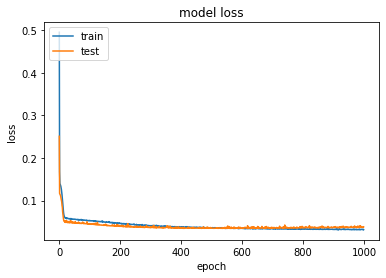

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

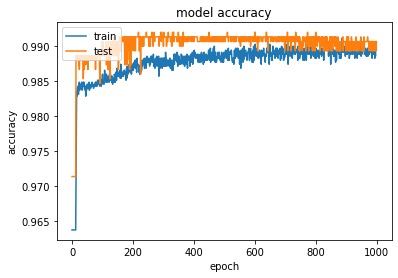

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
keras.backend.clear_session()